# Lin Reg

In [ ]:
# KNN,lin. reg, logiszitkus reg, dis. tree, booting, bagging, rnd forest, q-learn, clustering, SVD

coefficient of determination: 0.46452151522421914
intercept: 103.5798776342624
slope: [-1.6125085]


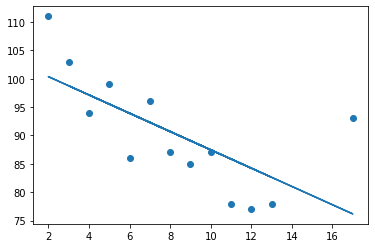

In [4]:
#Lin. reg:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x =  np.array([5,7,8,13,2,17,3,10,4,11,12,9,6])
y =  np.array([99,96,87,78,111,93,103,87,94,78,77,85,86])

plt.scatter(x, y)
plt.show()

x = x.reshape(-1,1)

#.fit() márixot vár, nem vektort
model = LinearRegression()
model = model.fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

#Lin reg kiszámítása és ábrázolása
m = model.coef_
b = model.intercept_
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.show()


# Log Reg

[[84  6]
 [ 1 52]]
Accuracy: 0.951048951048951


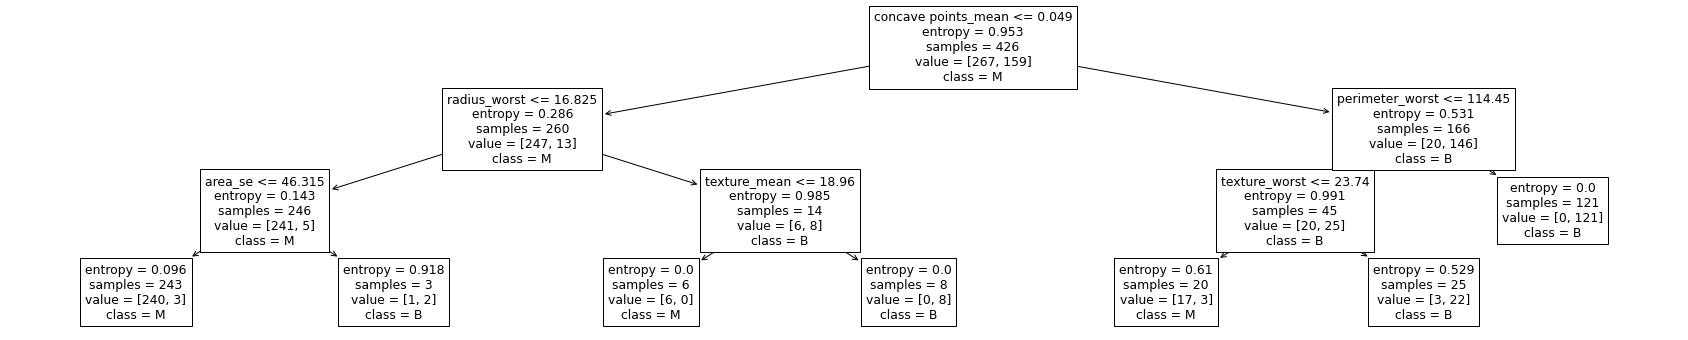

In [3]:
#Decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
dataset = pd.read_csv(url, names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

dataset.head()


# X megadása, miden sor, 2 oszloptól a 32.ig --> X:Y
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

#Tanító és teszt szétválogatása
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#Tree import
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state = 0)

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

#Tree kiíársa
from sklearn import tree
plt.figure(figsize=(30,6))
tree.plot_tree(classifier,feature_names=dataset.columns[2:], class_names=["M", "B"])
plt.show()

# Decision tree

[[84  6]
 [ 1 52]]
Accuracy: 0.951048951048951


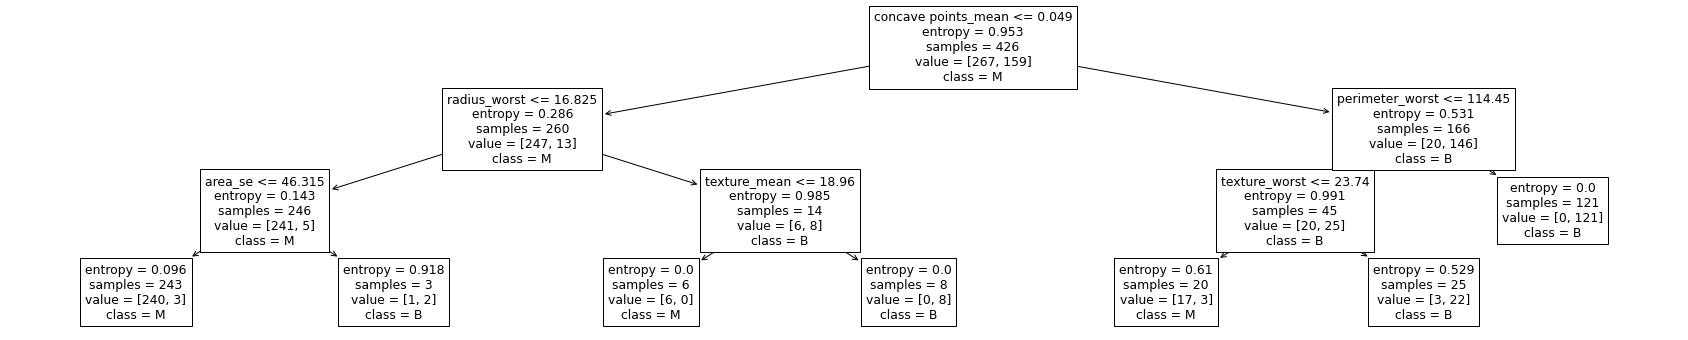

In [2]:
#Decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
dataset = pd.read_csv(url, names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

dataset.head()


# X megadása, miden sor, 2 oszloptól a 32.ig --> X:Y
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

#Tanító és teszt szétválogatása
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#Tree import
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state = 0)

classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

#Tree kiíársa
from sklearn import tree
plt.figure(figsize=(30,6))
tree.plot_tree(classifier,feature_names=dataset.columns[2:], class_names=["M", "B"])
plt.show()

# Bagging - Random Forest

In [8]:
# importing needed libraries
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# reading the data
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)

#X,Y lértehozása a dataframe-ből
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

#print(dataframe.head())
#print(X)
#print(Y)

#Splitelés
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

#tanítás
#n_est - 100db DT-t használ
import time
start_time = time.time()
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=2)

# Fit your model
model.fit(X_train, Y_train)

# Evaluate your model with the score function
print("Score: " + str(model.score(X_test, Y_test)))
time.time()-start_time

#Másik ellenörzés
results = model_selection.cross_val_score(model, X, Y, cv=10)
print(results)
print(results.mean())

Score: 0.8020833333333334
[0.7012987  0.79220779 0.76623377 0.67532468 0.77922078 0.80519481
 0.81818182 0.80519481 0.72368421 0.78947368]
0.7656015037593985


In [9]:
from sklearn.ensemble import RandomForestClassifier
start_time=time.time()
model = RandomForestClassifier(n_estimators=100, max_features=3, random_state=2)

# Fit your model
model.fit(X_train, Y_train)

# Evaluate your model with the score function
print(model.score(X_test, Y_test))
time.time()-start_time

results = model_selection.cross_val_score(model, X, Y, cv=10)

# Print the mean of the 10 results
print(results.mean())

0.7916666666666666
0.7630211893369788


# Boosting

In [10]:
#ALAP
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# reading data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [12]:
#Ada boosting

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=30, random_state=7)

# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(model, X, Y, cv=10)

# Print the mean of the 10 results
print(results.mean())

model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.746120984278879
0.75


In [13]:
#Stochastic Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, random_state=7)

results = model_selection.cross_val_score(model, X, Y, cv=10)

print(results.mean())

# Check what result you get without cross-validation
# Fit your model on the training dataset and evaluate it
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))

0.7617053998632947
0.7447916666666666


In [14]:
#Voting Ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Create a list for the submodels: estimators
estimators = []

# Create a logistic regression model: model1
model1 = LogisticRegression(solver='newton-cg')

# Append model1 to the estimators list in format ('logistic', model1)
estimators.append(('logistic', model1))

# Create a decision tree model: model2
model2 = DecisionTreeClassifier()

# Append model1 to the estimators list in format ('decision_tree', model2)
estimators.append(('decision_tree', model2))

# Create an SVC model: model3
model3 = SVC(gamma='auto')

# Append model1 to the estimators list in format ('svm', model3)
estimators.append(('svm', model3))


# Create the ensemble model from the estimators by VotingClassifier: ensemble 
ensemble = VotingClassifier(estimators)

# Evaulate the model using the 10-fold cross validation: results
results = model_selection.cross_val_score(ensemble, X, Y, cv=10)

# Print the mean of the 10 results
print(results.mean())

# Check what result you get without cross-validation
# Fit your model on the training dataset and evaluate it
ensemble.fit(X_train, Y_train)
print(ensemble.score(X_test, Y_test))


0.7447881066302119
0.765625


In [23]:
#SVM
from sklearn import datasets
cancer = datasets.load_breast_cancer()

#print("Features: ", cancer.feature_names)
#print("Labels: ", cancer.target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) 

from sklearn import svm
clf = svm.SVC(kernel='linear') 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629


In [25]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, verbose = 2)

grid.fit(X_train, y_train)

grid_predictions = grid.predict(X_test)

grid_predictions

print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))
print("Precision:",metrics.precision_score(y_test, grid_predictions))
print("Recall:",metrics.accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

# K-means

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans

[[ -6.08740047  -3.17242795]
 [ -1.54351242   4.43488913]
 [ -7.09302115  -8.11003868]
 [-10.00765826  -3.85079766]]


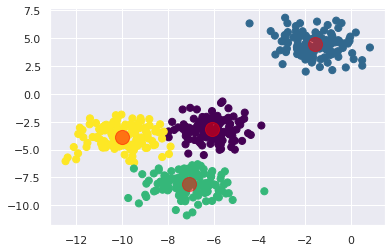

In [22]:
from sklearn.datasets import make_blobs

# use the make_blobs function to create the X and y_ture variables
# let n_samples = 500, centers = 4, cluster_std = 0.40, random_state = 0
X, y_true = make_blobs(n_samples = 500, centers = 4,
            cluster_std = 0.99, random_state = 1)

#Adatpontok ábrázolása
plt.scatter(X[:, 0], X[:, 1], s = 50)
# show the plot
plt.show()

#KM alkalmazása
kmeans = KMeans(n_clusters = 4)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# create a scatter plot from X like before, just this time add y_kmeans to be the color, and add parameter cmap='viridis'
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
# show the plot
plt.show()

#Center megmutatása
centers = kmeans.cluster_centers_
print(centers)
# create the same colorful scatter plot as above
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
# create a scatter plot with x axis: 1.coord of the centers, y axis: 2.coord of the centers
# color it to red, let s=200 and set alpha to 0.5
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5)
# show the plot
plt.show()